<a href="https://colab.research.google.com/github/Nik8x/R_Practice/blob/main/Retailer_data_market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("cluster")
library("cluster")
library("tidyverse")
library('readxl') # package to read excel file
install.packages("car") # installing package
library('car') #  package for the 'some' function
install.packages("fpc") # installing package
library("fpc")
install.packages("arules") # installing package
library("arules")
library("arules") # for plotting
install.packages("arulesViz") # installing package
library("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following o

In [ ]:
df <- read_excel('/content/Online Retailer Data.xlsx') # loading data into a dataframe variable
dim(df) # dimensions of the dataframe
head(df, 2) # show top 2 records

[1] 198433      8

TransactionID,CustomerID,Order_Date,Brand,Product,Color,Size,Sales_Amount
<dbl>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>
586916,666668,2020-04-16,Under Armour,V-Neck,NEON,32,14
586916,666668,2020-04-16,Under Armour,Shorts,BRIGHT PINK,24,3


In [ ]:
tail(df, 2) # show last 2 records

TransactionID,CustomerID,Order_Date,Brand,Product,Color,Size,Sales_Amount
<dbl>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>
592671,157594,2020-04-16,Nike,Strapless,BLACK,38D,25
592671,157595,2020-04-16,Adidas,Racerback,BLACK/MEDIUM GREY,X LARGE,18


In [ ]:
str(df) # structure of the dataframe

tibble [198,433 × 8] (S3: tbl_df/tbl/data.frame)
 $ TransactionID: num [1:198433] 586916 586916 589601 589357 589357 ...
 $ CustomerID   : num [1:198433] 666668 666668 666714 666742 666742 ...
 $ Order_Date   : POSIXct[1:198433], format: "2020-04-16" "2020-04-16" ...
 $ Brand        : chr [1:198433] "Under Armour" "Under Armour" "Under Armour" "New Balance" ...
 $ Product      : chr [1:198433] "V-Neck" "Shorts" "Sports Bra" "Polo" ...
 $ Color        : chr [1:198433] "NEON" "BRIGHT PINK" "WHITE" "NAVY" ...
 $ Size         : chr [1:198433] "32" "24" "44B" "2X LARGE" ...
 $ Sales_Amount : num [1:198433] 14 3 56 27 53 45 64 18 18 23 ...


In [ ]:
summary(df) # summary of all the variables of the dataframe

 TransactionID       CustomerID        Order_Date                    
 Min.   :     13   Min.   : 150391   Min.   :2017-01-05 00:00:00.00  
 1st Qu.: 435313   1st Qu.: 153491   1st Qu.:2017-12-13 00:00:00.00  
 Median : 848855   Median : 156832   Median :2018-11-07 00:00:00.00  
 Mean   : 873627   Mean   : 162958   Mean   :2018-11-04 22:36:54.53  
 3rd Qu.:1320497   3rd Qu.: 162259   3rd Qu.:2019-10-09 00:00:00.00  
 Max.   :1770517   Max.   :2422694   Max.   :2020-08-06 00:00:00.00  
    Brand             Product             Color               Size          
 Length:198433      Length:198433      Length:198433      Length:198433     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                

In [ ]:
# Extract the month and create a new column
df$OrderMonth <- format(df$Order_Date, "%m")

# convert the columns to factor if it's not already
df$TransactionID <- as.factor(df$TransactionID)
df$CustomerID <- as.factor(df$CustomerID)
df$OrderMonth <- as.factor(df$OrderMonth)
df$Brand <- as.factor(df$Brand)
df$Product <- as.factor(df$Product)
df$Color <- as.factor(df$Color)
df$Size <- as.factor(df$Size)

In [ ]:
str(df) # structure of the dataframe

tibble [198,433 × 9] (S3: tbl_df/tbl/data.frame)
 $ TransactionID: Factor w/ 69593 levels "13","35","87",..: 23730 23730 23838 23829 23829 23839 23960 23679 23679 23679 ...
 $ CustomerID   : Factor w/ 17449 levels "150391","150392",..: 17291 17291 17292 17293 17293 17294 17295 17296 17296 17296 ...
 $ Order_Date   : POSIXct[1:198433], format: "2020-04-16" "2020-04-16" ...
 $ Brand        : Factor w/ 8 levels "Adidas","Diadora",..: 8 8 8 3 3 3 1 3 3 3 ...
 $ Product      : Factor w/ 77 levels "Ankle","Belt",..: 74 51 56 47 16 5 16 7 7 7 ...
 $ Color        : Factor w/ 3698 levels "AERO","AFRIC VIOL",..: 1795 612 3018 1738 3018 3018 217 75 75 1853 ...
 $ Size         : Factor w/ 237 levels "10","10-12","10-13",..: 42 25 116 32 192 223 201 172 175 172 ...
 $ Sales_Amount : num [1:198433] 14 3 56 27 53 45 64 18 18 23 ...
 $ OrderMonth   : Factor w/ 12 levels "01","02","03",..: 4 4 4 4 4 4 4 4 4 4 ...


In [ ]:
summary(df) # summary of all the variables of the dataframe

 TransactionID      CustomerID       Order_Date                    
 829450 :    38   1078824:    35   Min.   :2017-01-05 00:00:00.00  
 1454345:    38   1264796:    32   1st Qu.:2017-12-13 00:00:00.00  
 1754871:    38   2200703:    25   Median :2018-11-07 00:00:00.00  
 624348 :    37   1981627:    24   Mean   :2018-11-04 22:36:54.53  
 1056506:    36   754536 :    18   3rd Qu.:2019-10-09 00:00:00.00  
 437399 :    35   1635998:    18   Max.   :2020-08-06 00:00:00.00  
 (Other):198211   (Other):198281                                   
          Brand              Product              Color              Size      
 New Balance :107913   Crewneck  :46937   WHITE      : 22935   LARGE   :26865  
 Nike        : 38798   Underwire :23945   BLACK      : 21966   X LARGE :23480  
 Adidas      : 22738   Pants     :14092   ASSORTED   : 16452   MEDIUM  :21128  
 Under Armour: 19832   V-Neck    :14074   NAVY       :  7629   2X LARGE:14573  
 Silkies     :  7243   Brief     :10901   NUDE       :  

In [ ]:
sapply(df, function(x){sum(is.na(x))}) # check for any missing data

TransactionID    CustomerID    Order_Date         Brand       Product 
            0             0             0             0             0 
        Color          Size  Sales_Amount    OrderMonth 
            0             0             0             0

In [ ]:
# exclude the TransactionNo, CustomerID, transaction date and product description and model the data
# df <- df %>% select(-TransactionID, -CustomerID, -Order_Date) %>% scale()
# dropping columns which are not that relevant
df$TransactionID <- NULL
df$CustomerID <- NULL
df$Order_Date <- NULL
some(df, 5) # to observe random obervations from the dataframe

Brand,Product,Color,Size,Sales_Amount,OrderMonth
<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
New Balance,Hooded Jacket,EBONY,LARGE,20,06
Nike,Underwire,WHITE,48DD,23,06
Nike,Underwire,SILVER LINING,36D,14,07
New Balance,Crewneck,LIGHT STEEL,X LARGE,7,04
New Balance,Pants,DEEP ROYAL,SMALL,7,11


In [ ]:
# to find association among the items, we will use apriori
df_ap <- apriori(df, parameter = list(supp = 0.02, conf = 0.8, target = "rules"))
# minimum support or frequency of 2%, considering low frequency to capture wider range
# confidence is the conditional probability, here 80% which is higher level
# we can change the support and confidence to change the "sorting and recoding items" below

Warning message:
“Column(s) 5 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3968 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4035 item(s), 198433 transaction(s)] done [0.35s].
sorting and recoding items ... [44 item(s)] done [0.01s].
creating transaction tree ... done [0.15s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [30 rule(s)] done [0.00s].
creating S4 object  ... done [0.04s].


In [ ]:
# lets examine the association rule with inspect. using lift>8 as the no. of observation is too high and we want to investigate a subset
# lift means how much chance is there of purchasing item B when item A is being purchased, also keeping in control the popularity of iteam B
inspect(subset(df_ap, lift > 8))

    lhs                      rhs                 support    confidence
[1] {Product=Boxer Brief} => {Color=ASSORTED}    0.02094410 0.8956897 
[2] {Product=Pantyhose}   => {Brand=Silkies}     0.03356801 1.0000000 
[3] {Brand=Silkies}       => {Product=Pantyhose} 0.03356801 0.9196466 
    coverage   lift     count
[1] 0.02338321 10.80321 4156 
[2] 0.03356801 27.39652 6661 
[3] 0.03650099 27.39652 6661 


In [ ]:
# sorting by supprt
df_ap_sup <- sort(df_ap, by = "support", decreasing = TRUE)
inspect(df_ap_sup[1:10])

     lhs                             rhs                    support confidence   coverage     lift count
[1]  {Product=Crewneck}           => {Brand=New Balance} 0.19786527  0.8365043 0.23653828 1.538184 39263
[2]  {Product=Crewneck,                                                                                 
      Sales_Amount=[0,11)}        => {Brand=New Balance} 0.11643225  0.8870460 0.13125841 1.631121 23104
[3]  {Product=Underwire}          => {Brand=Nike}        0.10599547  0.8783880 0.12067045 4.492530 21033
[4]  {Product=Underwire,                                                                                
      Sales_Amount=[22,1.03e+03]} => {Brand=Nike}        0.08351433  0.9308544 0.08971794 4.760870 16572
[5]  {Color=ASSORTED}             => {Brand=New Balance} 0.07562754  0.9121687 0.08290960 1.677318 15007
[6]  {Size=2X LARGE}              => {Brand=New Balance} 0.05945584  0.8095794 0.07344041 1.488674 11798
[7]  {Size=LARGE,                                      

In [ ]:
# sorting by confidence
df_ap_con <- sort(df_ap, by = "confidence", decreasing = TRUE)
inspect(df_ap_con[1:10])

     lhs                             rhs                    support confidence   coverage      lift count
[1]  {Product=Pantyhose}          => {Brand=Silkies}     0.03356801  1.0000000 0.03356801 27.396521  6661
[2]  {Product=Crewneck,                                                                                  
      Size=X LARGE,                                                                                      
      Sales_Amount=[0,11)}        => {Brand=New Balance} 0.02596846  0.9798441 0.02650265  1.801761  5153
[3]  {Size=2X LARGE,                                                                                     
      Sales_Amount=[0,11)}        => {Brand=New Balance} 0.02933484  0.9725982 0.03016131  1.788437  5821
[4]  {Product=Crewneck,                                                                                  
      Size=LARGE,                                                                                        
      Sales_Amount=[0,11)}        => {Brand=Ne

In [ ]:
# sorting by lift
df_ap_lift <- sort(df_ap, by = "lift", decreasing = TRUE)
inspect(df_ap_lift[1:10])

     lhs                             rhs                             support confidence   coverage      lift count
[1]  {Product=Pantyhose}          => {Brand=Silkies}              0.03356801  1.0000000 0.03356801 27.396521  6661
[2]  {Brand=Silkies}              => {Product=Pantyhose}          0.03356801  0.9196466 0.03650099 27.396521  6661
[3]  {Product=Boxer Brief}        => {Color=ASSORTED}             0.02094410  0.8956897 0.02338321 10.803208  4156
[4]  {Product=Underwire,                                                                                          
      Sales_Amount=[22,1.03e+03]} => {Brand=Nike}                 0.08351433  0.9308544 0.08971794  4.760870 16572
[5]  {Product=Underwire}          => {Brand=Nike}                 0.10599547  0.8783880 0.12067045  4.492530 21033
[6]  {Brand=Nike,                                                                                                 
      Color=WHITE}                => {Sales_Amount=[22,1.03e+03]} 0.02360998  0.

In [ ]:
# lets inspect redundant rules
df_red <- is.redundant(df_ap)
df_red
summary(df_red)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

   Mode   FALSE    TRUE 
logical      29       1 

In [ ]:
# above 20 are redundant,we can remove them
df_ap_r <- df_ap[- df_red]
df_ap_r

set of 29 rules 

In [ ]:
inspect(df_ap_r)

     lhs                             rhs                             support confidence   coverage      lift count
[1]  {Product=Boxer Brief}        => {Brand=New Balance}          0.02129686  0.9107759 0.02338321  1.674756  4226
[2]  {Color=LIGHT STEEL}          => {Brand=New Balance}          0.02372085  0.8658940 0.02739464  1.592227  4707
[3]  {Product=Pantyhose}          => {Brand=Silkies}              0.03356801  1.0000000 0.03356801 27.396521  6661
[4]  {Brand=Silkies}              => {Product=Pantyhose}          0.03356801  0.9196466 0.03650099 27.396521  6661
[5]  {Size=3X LARGE}              => {Brand=New Balance}          0.03069550  0.8726361 0.03517560  1.604624  6091
[6]  {Size=2X LARGE}              => {Brand=New Balance}          0.05945584  0.8095794 0.07344041  1.488674 11798
[7]  {Color=ASSORTED}             => {Brand=New Balance}          0.07562754  0.9121687 0.08290960  1.677318 15007
[8]  {Product=Underwire}          => {Brand=Nike}                 0.10599547  0.

In [ ]:
# we have 29 rules
# 1st rule -> if transaction contains "Product=Boxer Brief" then it is highly likely to be "Brand=New Balance"
# above combination can be seen for 2.12% (support) of basket
# lift (strength of association) tells us that the above combination is almost 2 times more likely to occur

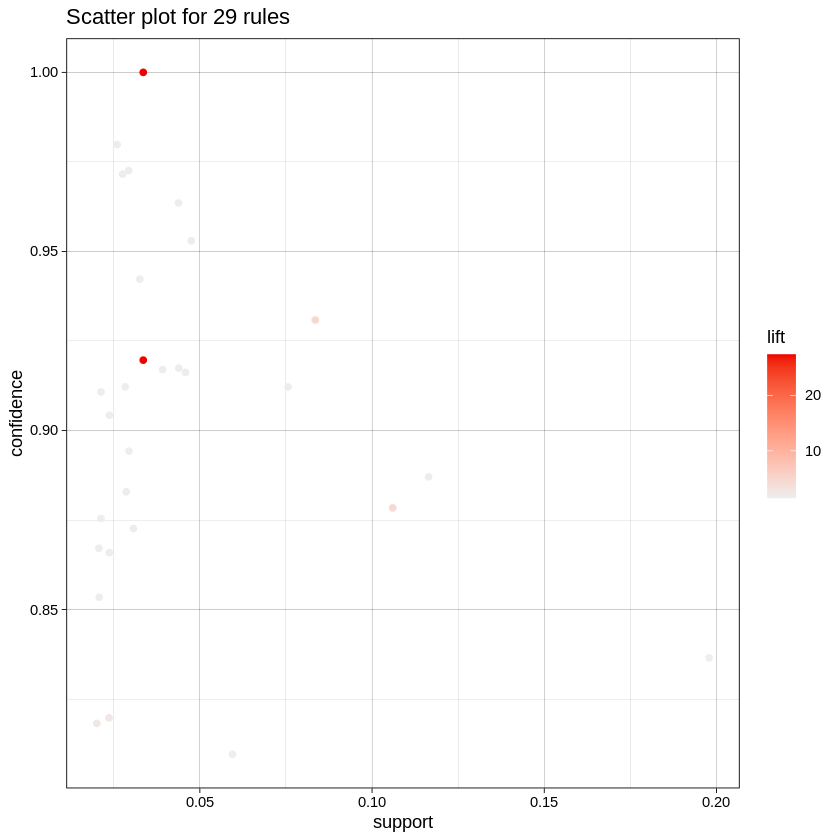

In [ ]:
plot(df_ap_r)

In [ ]:
# lets look into highest 25 lift rules
df_ap_r_high <- head(sort(df_ap_r, by = "lift", 25))
inspect(df_ap_r_high)

    lhs                             rhs                             support confidence   coverage      lift count
[1] {Product=Pantyhose}          => {Brand=Silkies}              0.03356801  1.0000000 0.03356801 27.396521  6661
[2] {Brand=Silkies}              => {Product=Pantyhose}          0.03356801  0.9196466 0.03650099 27.396521  6661
[3] {Product=Underwire,                                                                                          
     Sales_Amount=[22,1.03e+03]} => {Brand=Nike}                 0.08351433  0.9308544 0.08971794  4.760870 16572
[4] {Product=Underwire}          => {Brand=Nike}                 0.10599547  0.8783880 0.12067045  4.492530 21033
[5] {Brand=Nike,                                                                                                 
     Color=WHITE}                => {Sales_Amount=[22,1.03e+03]} 0.02360998  0.8197725 0.02880065  2.308390  4685
[6] {Brand=Nike,                                                                        

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


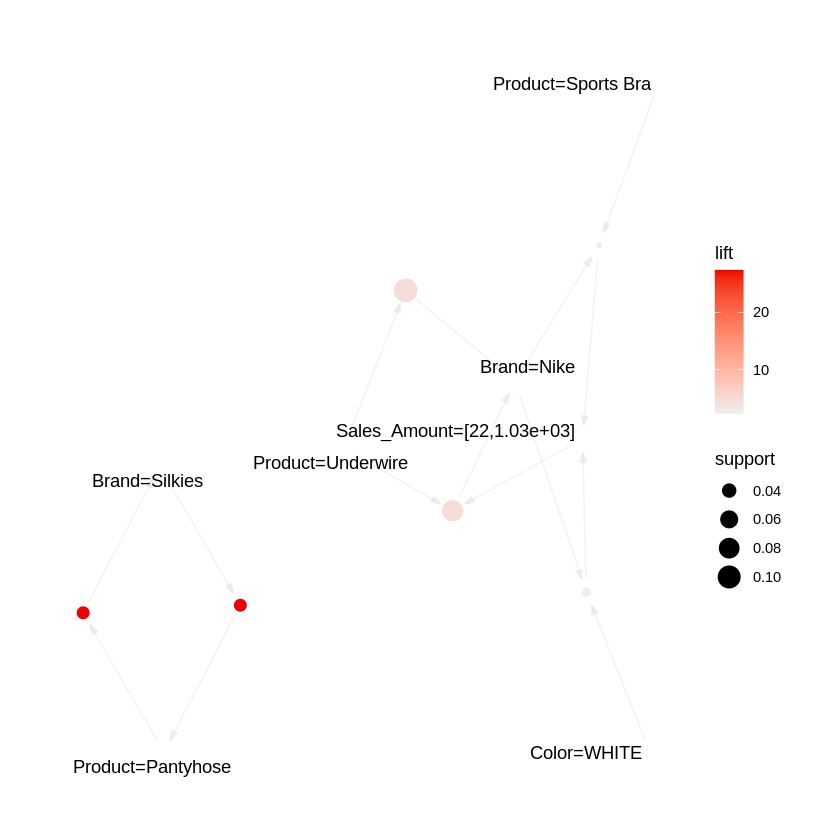

In [ ]:
# plotting key clusters based on lift & support
plot(df_ap_r_high, method = "graph", control = list(type = "items"))

In [ ]:
# plotting more interactive plot
# not working in jupyter
# plot(df_ap_r_high, method = "graph", engine = "interactive")
# # Error in structure(.External(.C_dotTclObjv, objv), class = "tclObj"): [tcl] invalid command name "font".

In [ ]:
# with the help of above results, we can suggest crossell or upsell or strategeis like bundles promotions